# Credit Card Fraud EDA
This notebook performs detailed exploratory data analysis (EDA) on the Kaggle Credit Card Fraud dataset to uncover insights beyond formal modeling.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
# Load dataset
df = pd.read_csv('creditcard.csv')
# Feature engineering
df['LogAmount'] = np.log1p(df['Amount'])

## 1. Missing Values & Summary Statistics

In [40]:
print('Missing values per column:')
print(df.isnull().sum())
print('\nSummary statistics:')
print(df.describe())

Missing values per column:
Time         0
V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20          0
V21          0
V22          0
V23          0
V24          0
V25          0
V26          0
V27          0
V28          0
Amount       0
Class        0
LogAmount    0
dtype: int64

Summary statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e

## 2. Class Distribution

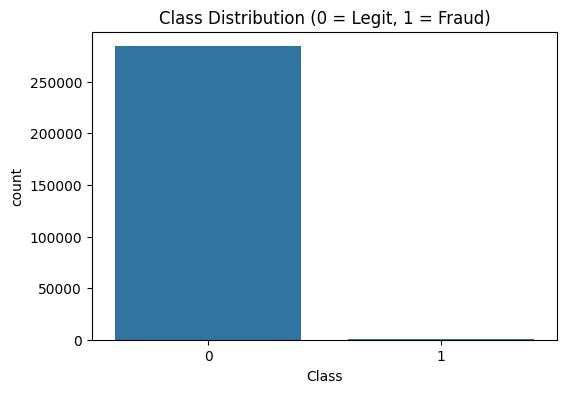

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Legit, 1 = Fraud)')
plt.show()

## 3. Distribution of Log(Amount)

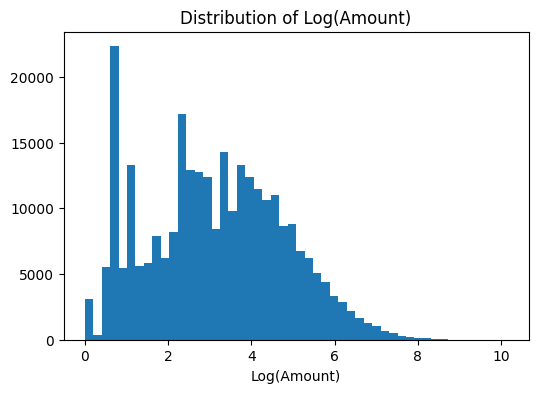

In [42]:
plt.figure(figsize=(6,4))
plt.hist(df['LogAmount'], bins=50)
plt.title('Distribution of Log(Amount)')
plt.xlabel('Log(Amount)')
plt.show()

## 4. Distribution of Transaction Time

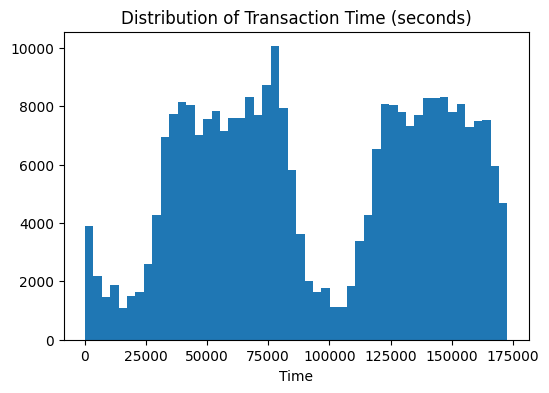

In [43]:
plt.figure(figsize=(6,4))
plt.hist(df['Time'], bins=50)
plt.title('Distribution of Transaction Time (seconds)')
plt.xlabel('Time')
plt.show()

## 5. Boxplot of Log(Amount) by Class

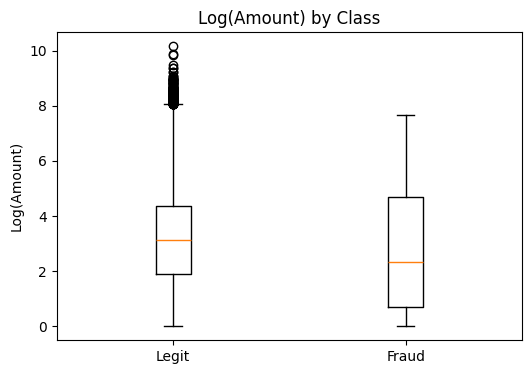

In [44]:
legit = df[df['Class']==0]['LogAmount']
legit = df[df['Class']==0]['LogAmount']
fraud = df[df['Class']==1]['LogAmount']
plt.figure(figsize=(6,4))
plt.boxplot([legit, fraud], tick_labels=['Legit', 'Fraud'])
plt.title('Log(Amount) by Class')
plt.ylabel('Log(Amount)')
plt.show()
plt.show()

## 6. Top 10 Features by Absolute Correlation with Class

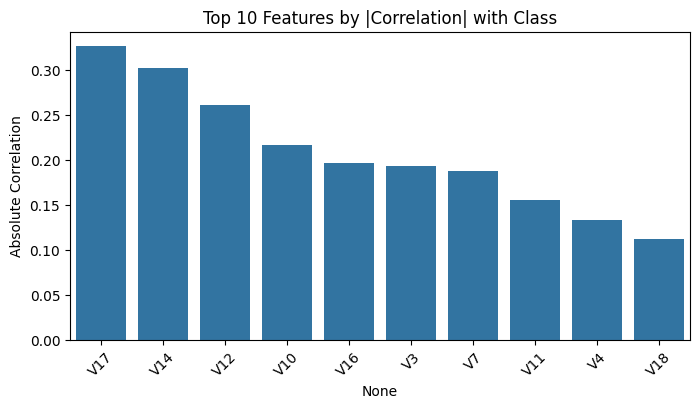

In [45]:
corr = df.corr()['Class'].abs().drop('Class')
top10 = corr.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top10.index, y=top10.values)
plt.title('Top 10 Features by |Correlation| with Class')
plt.xticks(rotation=45)
plt.ylabel('Absolute Correlation')
plt.show()

## 7. Mean Feature Values by Class for Top Features

<Figure size 800x600 with 0 Axes>

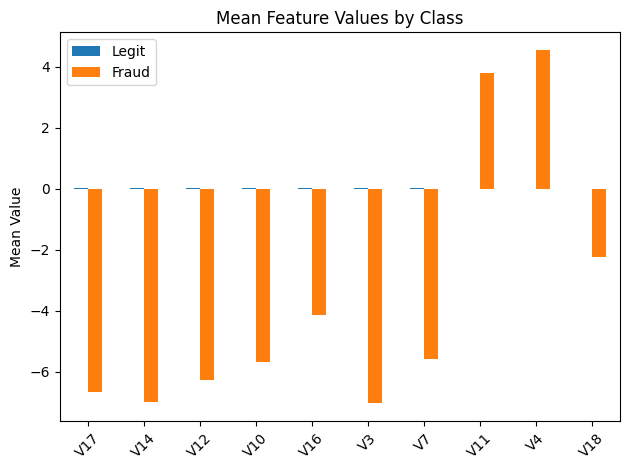

In [46]:
top_feats = top10.index.tolist()
means = df.groupby('Class')[top_feats].mean().T
plt.figure(figsize=(8,6))
means.plot(kind='bar')
plt.title('Mean Feature Values by Class')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(['Legit','Fraud'])
plt.tight_layout()
plt.show()

## 8. Transactions per Hour by Class

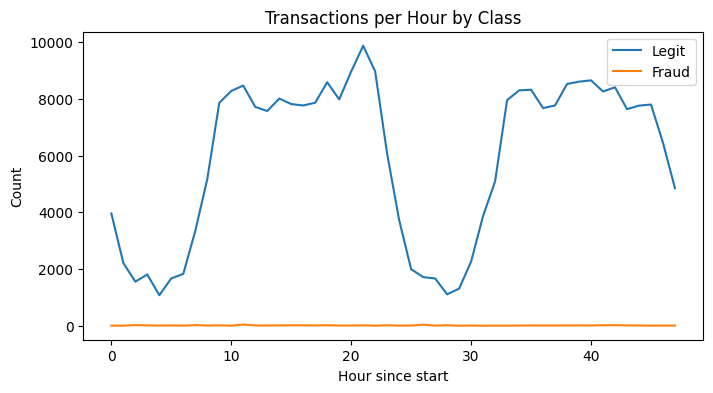

In [47]:
df['Hour'] = (df['Time'] // 3600).astype(int)
hourly = df.groupby(['Hour','Class']).size().unstack(fill_value=0)
plt.figure(figsize=(8,4))
plt.plot(hourly.index, hourly[0], label='Legit')
plt.plot(hourly.index, hourly[1], label='Fraud')
plt.title('Transactions per Hour by Class')
plt.xlabel('Hour since start')
plt.ylabel('Count')
plt.legend()
plt.show()

## 9. Correlation Heatmap of Top Features

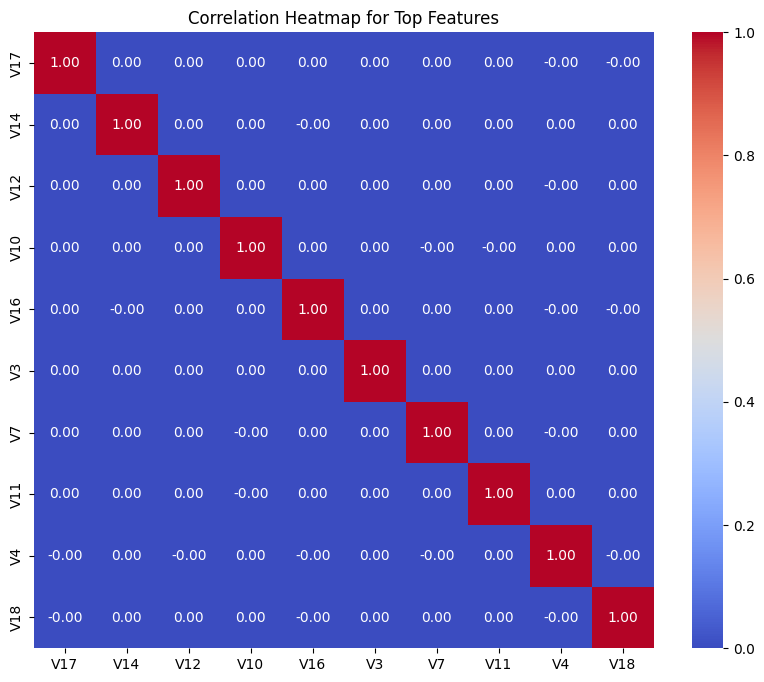

In [48]:
# Compute correlations for top features
top_feats = top10.index.tolist()  # from earlier cell
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_feats].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for Top Features')
plt.show()

## 10. Pairplot of Key Features

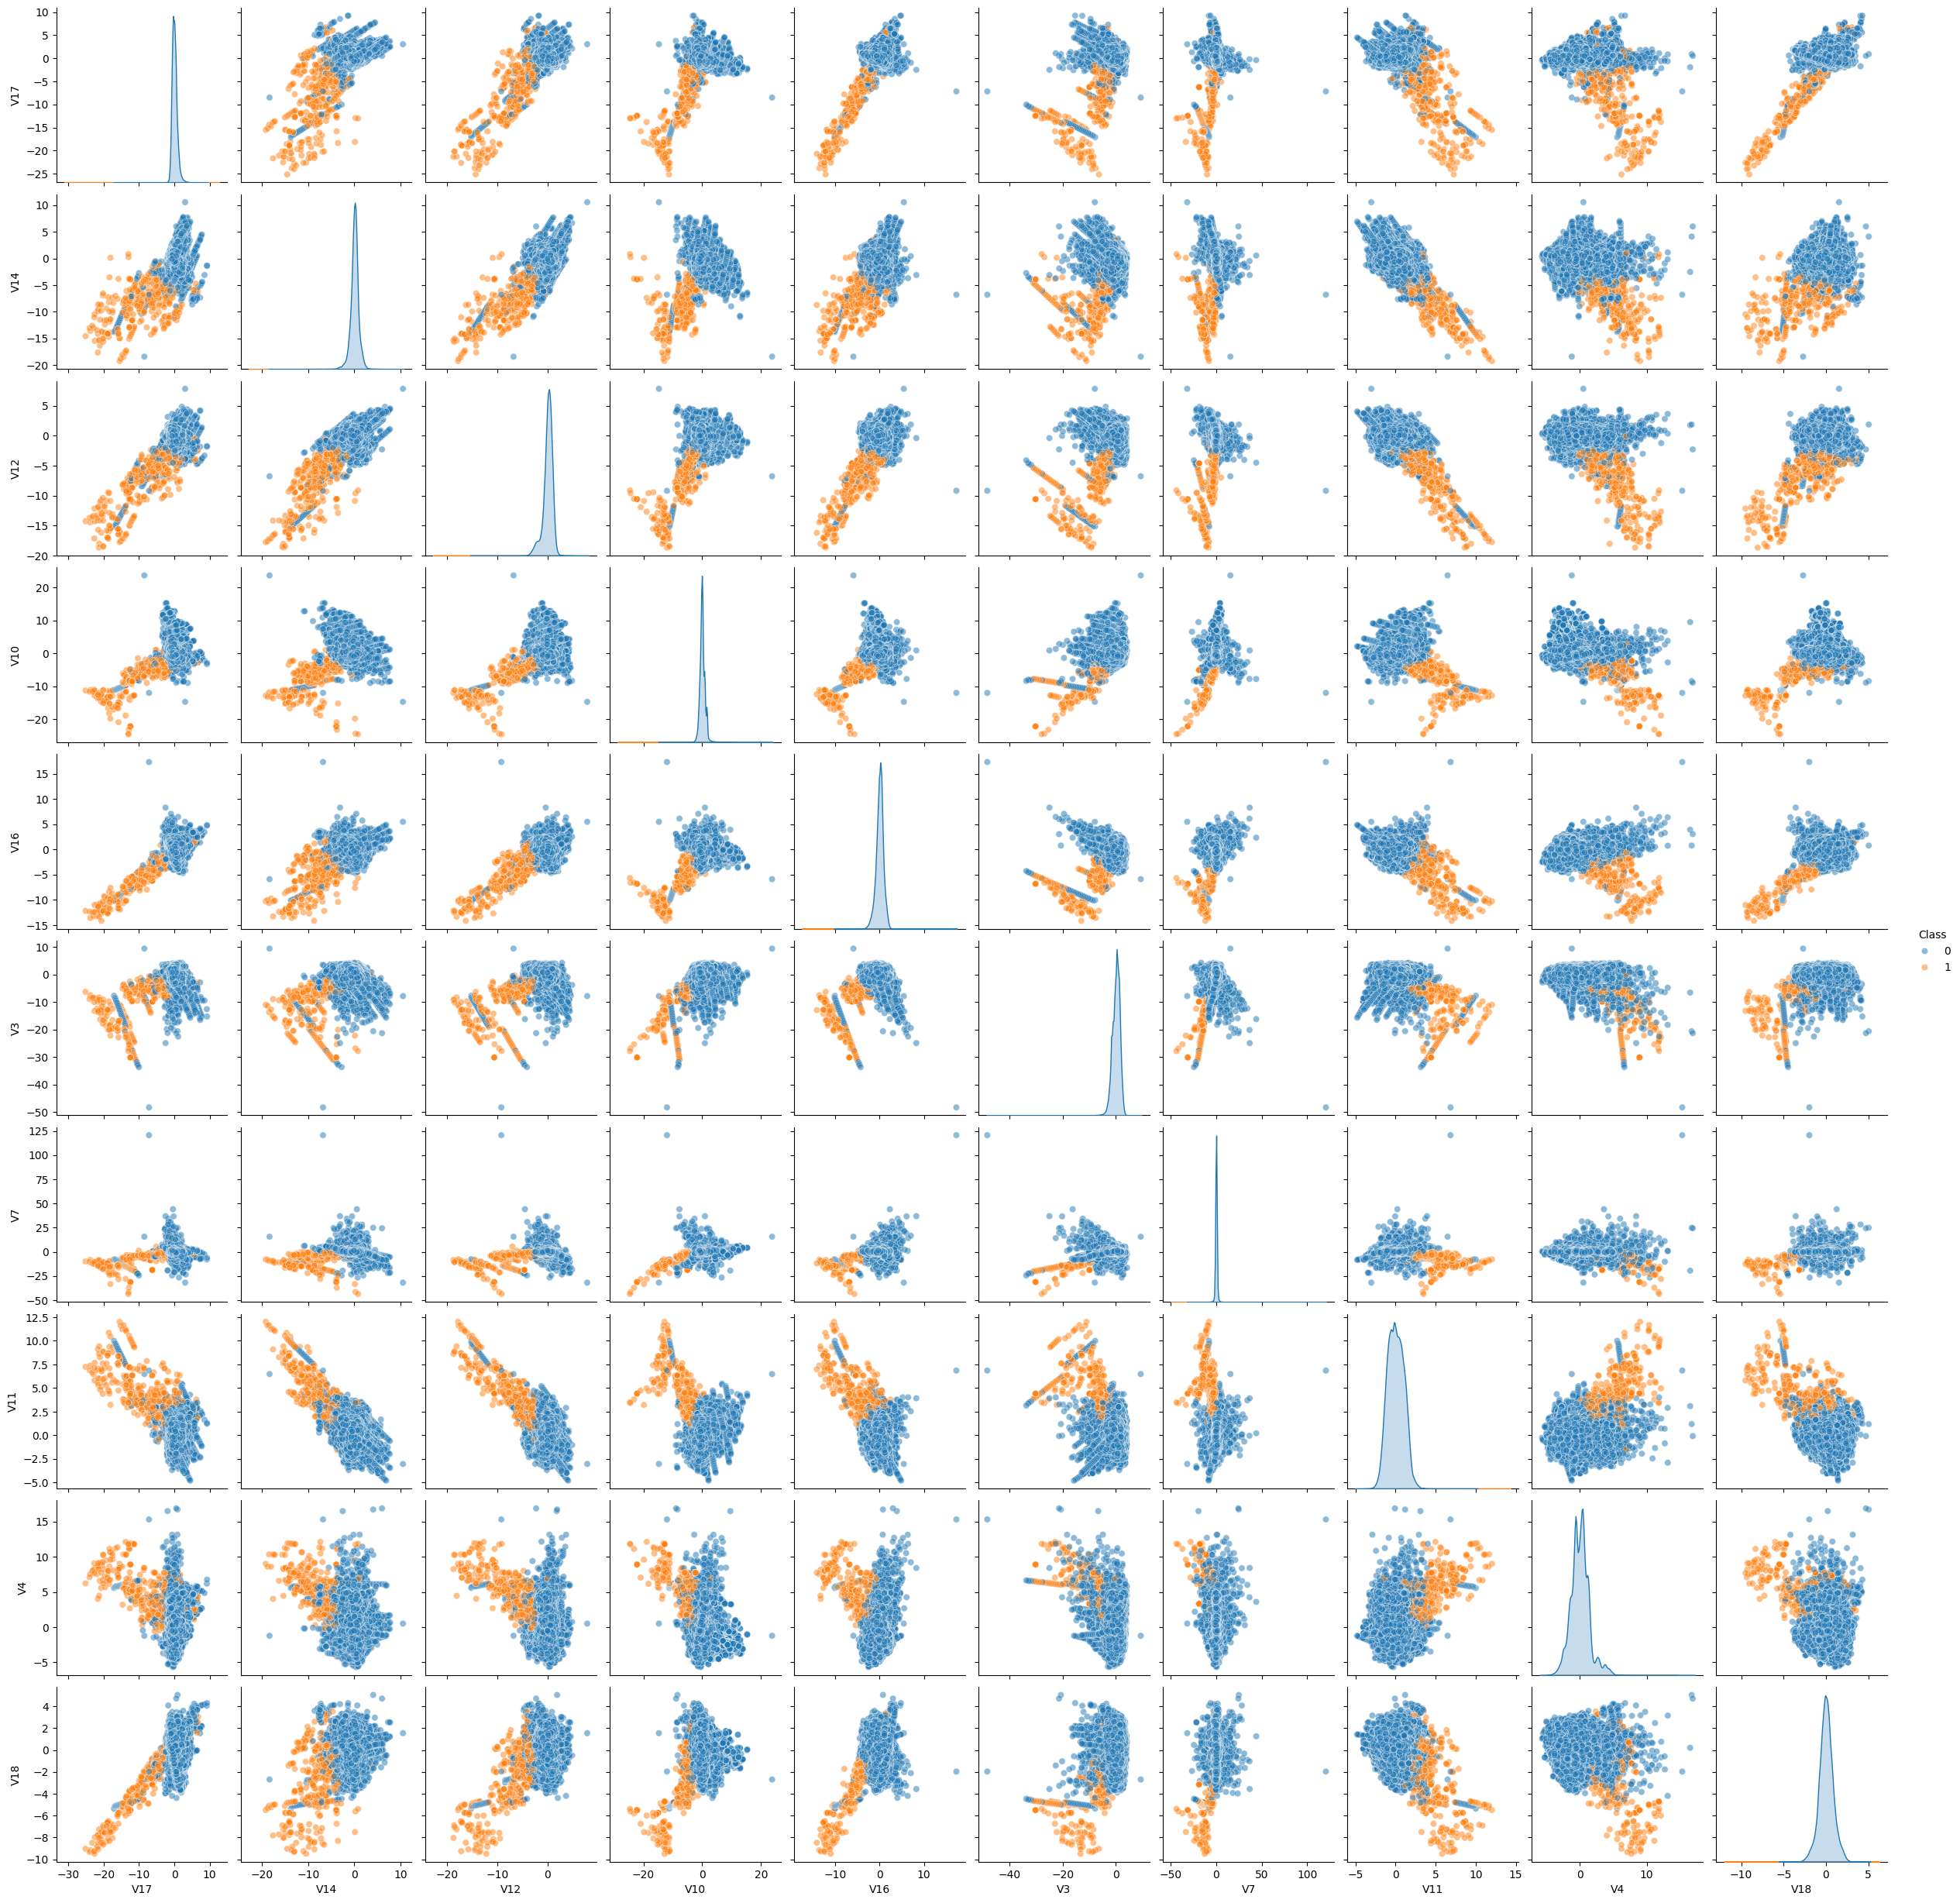

In [49]:
# Pairplot for top features to explore interactions
sns.pairplot(df[top_feats + ['Class']], hue='Class', vars=top_feats, plot_kws={'alpha':0.5}, diag_kind='kde')
plt.show()

## 11. Scatter Plot: Log(Amount) vs V17 by Class

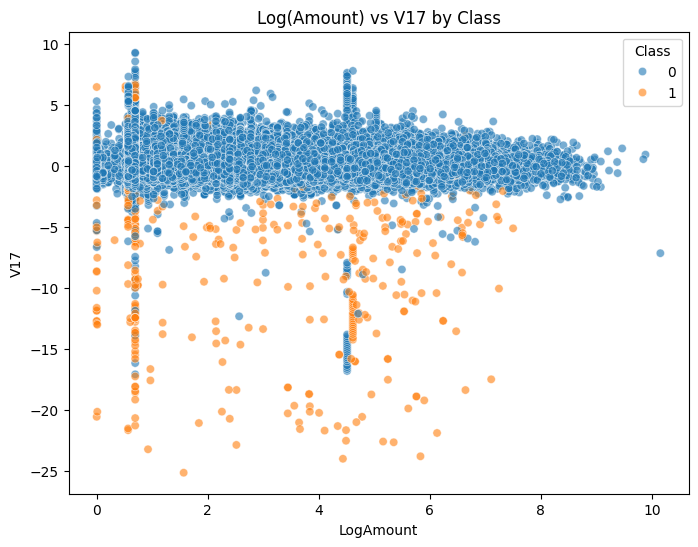

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LogAmount', y='V17', hue='Class', data=df, alpha=0.6)
plt.title('Log(Amount) vs V17 by Class')
plt.show()

## 12. Cumulative Fraud Transactions Over Time

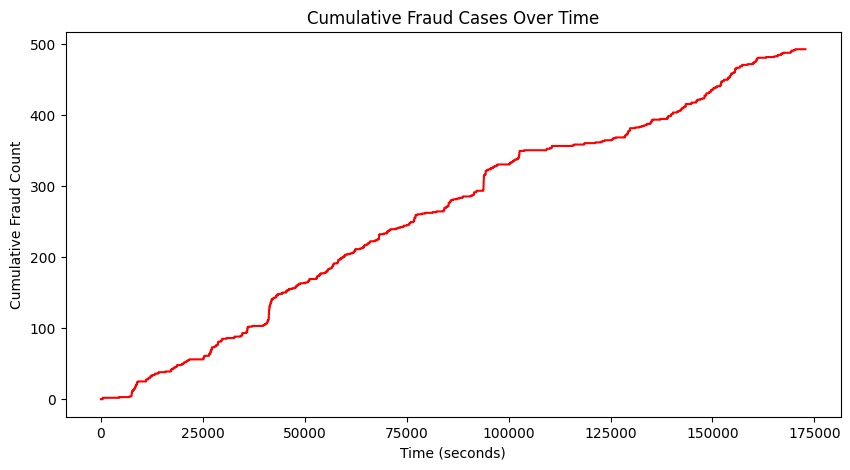

In [51]:
# Cumulative sum of fraud cases over time
df_sorted = df.sort_values('Time')
df_sorted['CumulativeFraud'] = df_sorted['Class'].cumsum()
plt.figure(figsize=(10, 5))
plt.plot(df_sorted['Time'], df_sorted['CumulativeFraud'], color='red')
plt.title('Cumulative Fraud Cases Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Fraud Count')
plt.show()

## 13. Feature Interaction: V14 vs V17 Colored by Class

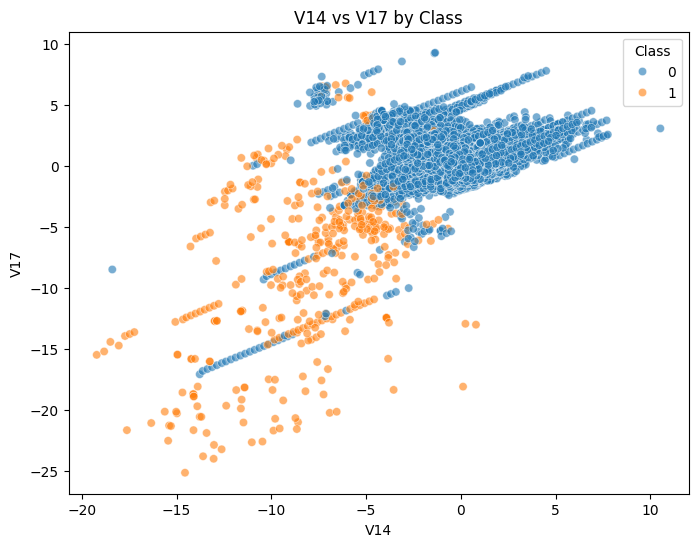

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='V14', y='V17', hue='Class', data=df, alpha=0.6)
plt.title('V14 vs V17 by Class')
plt.show()

## 14. Fraud Rate by Transaction Amount Bins

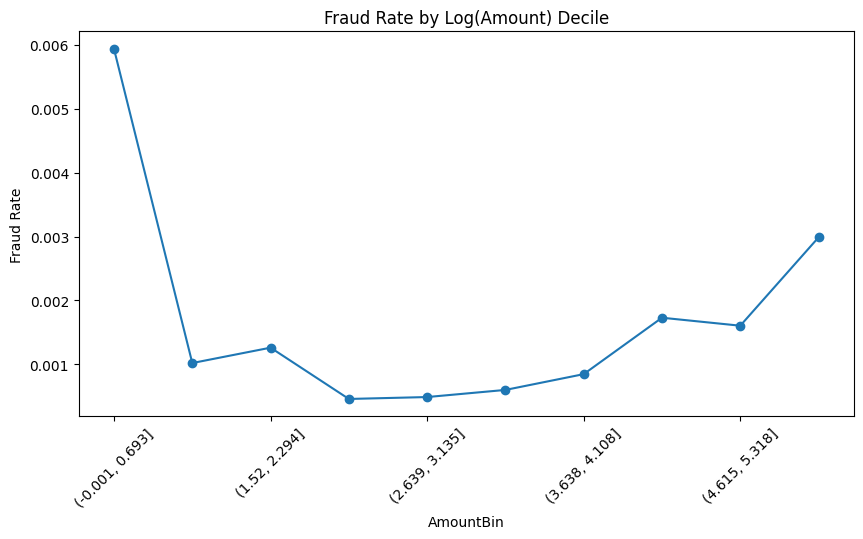

In [53]:
# Create bins for LogAmount and compute fraud rate
df['AmountBin'] = pd.qcut(df['LogAmount'], q=10)
bin_rates = df.groupby('AmountBin',observed=True)['Class'].mean()
plt.figure(figsize=(10,5))
bin_rates.plot(marker='o')
plt.title('Fraud Rate by Log(Amount) Decile')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

## 15. Hour-of-Day Fraud Rate

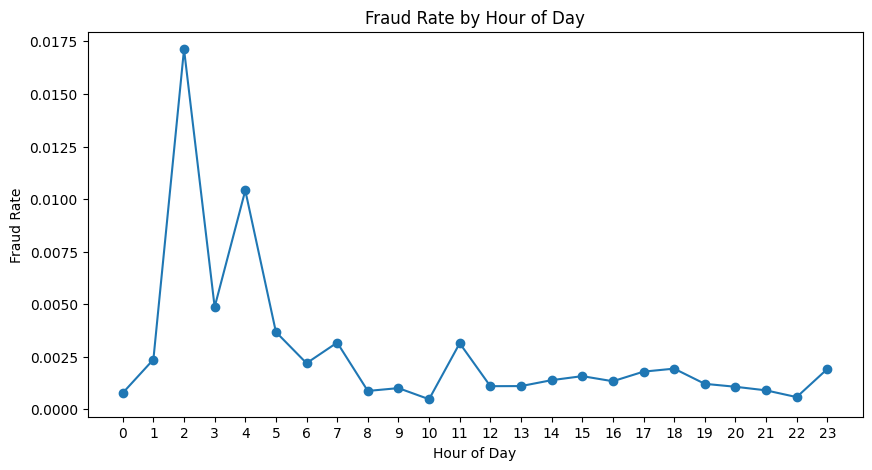

In [54]:
# Convert to hour of day and compute fraud rate
df['Hour24'] = ((df['Time'] // 3600) % 24).astype(int)
hourly_rate = df.groupby('Hour24')['Class'].mean()
plt.figure(figsize=(10,5))
hourly_rate.plot(marker='o')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.xticks(range(0,24))
plt.show()

## 16. PCA Projection of Transactions

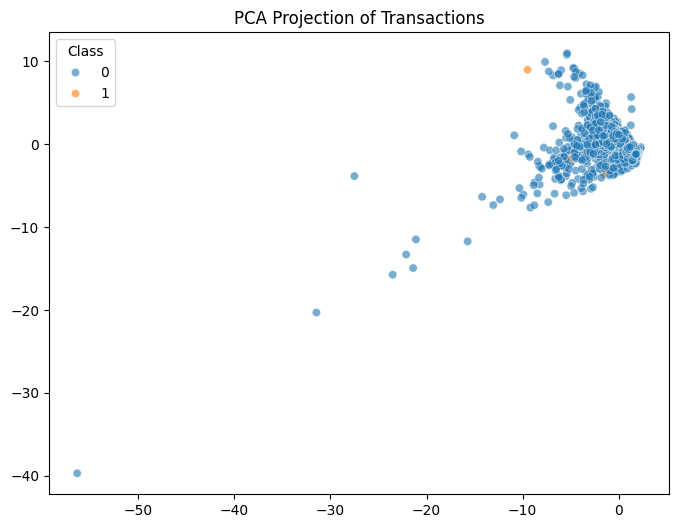

In [55]:
from sklearn.decomposition import PCA
# Sample for performance
sample = df.sample(n=5000, random_state=42)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(sample[[f'V{i}' for i in range(1,29)]])
plt.figure(figsize=(8,6))
sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=sample['Class'], alpha=0.6)
plt.title('PCA Projection of Transactions')
plt.show()

## 17. t-SNE Projection of Transactions

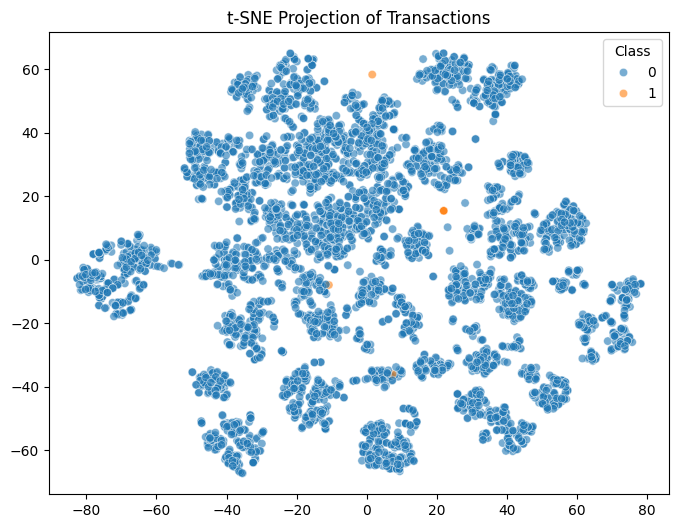

In [56]:
from sklearn.manifold import TSNE
# Sample subset for performance
sample = df.sample(n=5000, random_state=42)
features = sample[[f'V{i}' for i in range(1,29)]].values
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
coords = tsne.fit_transform(features)
plt.figure(figsize=(8,6))
sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=sample['Class'], alpha=0.6)
plt.title('t-SNE Projection of Transactions')
plt.show()

## 18. Violin Plots of Key Features by Class

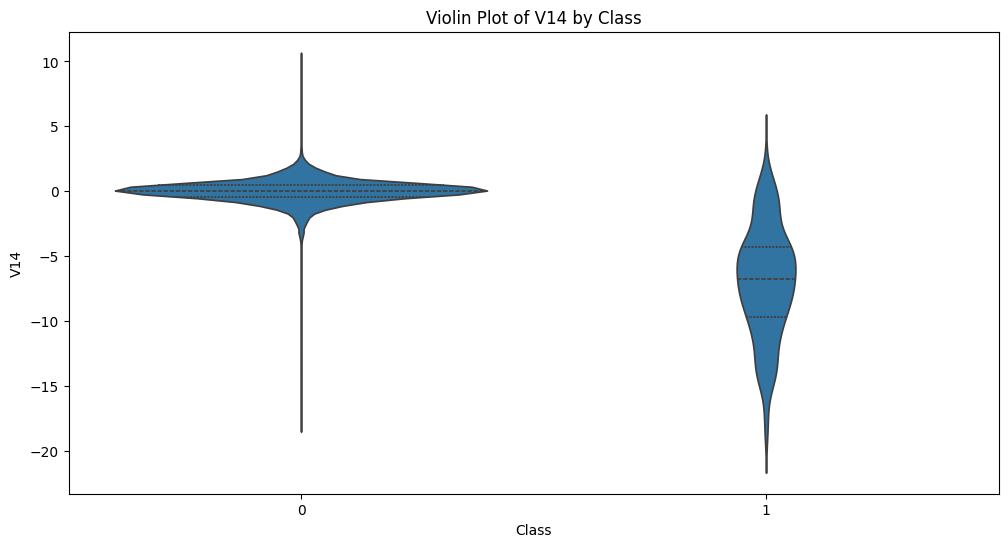

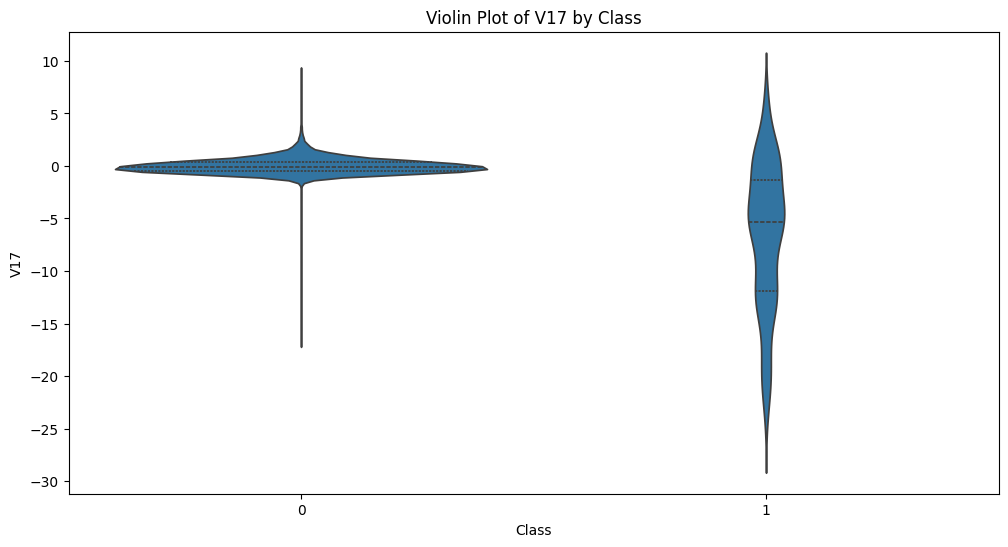

In [57]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Class', y='V14', data=df, inner='quartile')
plt.title('Violin Plot of V14 by Class')
plt.show()
plt.figure(figsize=(12,6))
sns.violinplot(x='Class', y='V17', data=df, inner='quartile')
plt.title('Violin Plot of V17 by Class')
plt.show()

## 19. Anomaly Score Distribution (Isolation Forest)

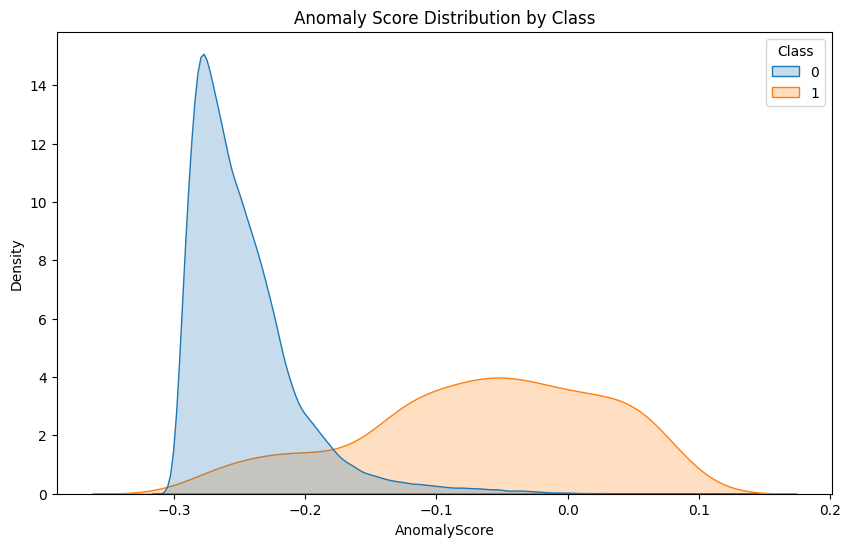

In [58]:
from sklearn.ensemble import IsolationForest
# Fit Isolation Forest on features + engineered columns
features = df[[f'V{i}' for i in range(1,29)] + ['LogAmount', 'Time']]
iso = IsolationForest(n_estimators=100, contamination=df['Class'].mean(), random_state=42)
iso.fit(features)
df['AnomalyScore'] = -iso.decision_function(features)
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='AnomalyScore', hue='Class', fill=True, common_norm=False)
plt.title('Anomaly Score Distribution by Class')
plt.show()

ROC and Precision Recall Curve for Isolation Forest

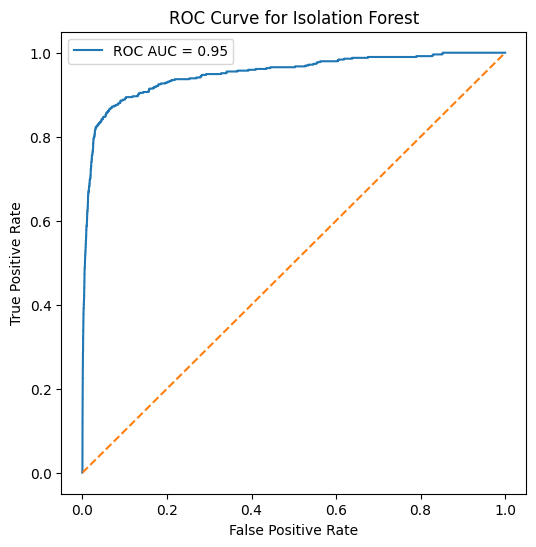

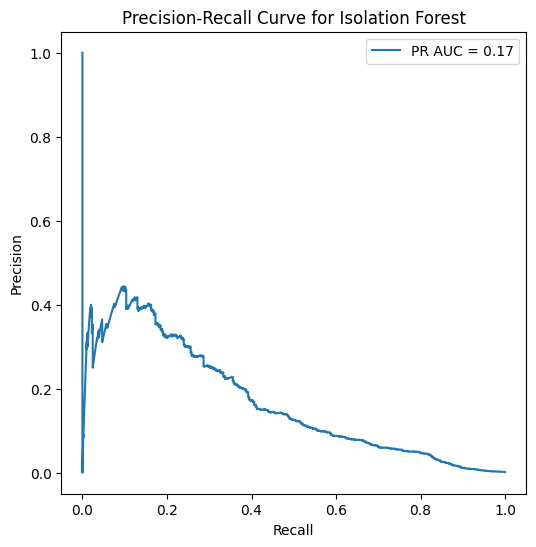

In [59]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import pandas as pd # Ensure pandas is imported if not already in the cell

# Check for and handle missing values in the columns used for metrics
# Although the error pointed to 'Class', let's check both just to be safe,
# assuming 'AnomalyScore' is the more likely source of recent NaNs.
df_metrics = df[['Class', 'AnomalyScore']].dropna()

# Extract the cleaned true labels and anomaly scores
y_true_metrics = df_metrics['Class']
y_score_metrics = df_metrics['AnomalyScore']

# Check if any data remains after dropping NaNs
if y_true_metrics.empty:
    print("Error: No non-NaN data remaining for metric calculation after dropping NaNs.")
else:
    # ROC Curve
    # Use the cleaned data for the calculation
    fpr, tpr, _ = roc_curve(y_true_metrics, y_score_metrics)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
    plt.plot([0,1],[0,1],'--')
    plt.title('ROC Curve for Isolation Forest')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Precision-Recall Curve
    # Use the cleaned data for the calculation
    precision, recall, _ = precision_recall_curve(y_true_metrics, y_score_metrics)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(6,6))
    plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
    plt.title('Precision-Recall Curve for Isolation Forest')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

## Data Cleaning
Remove duplicates and impute any missing values.

In [60]:
import pandas as pd
# Drop duplicate transactions
df.drop_duplicates(inplace=True)
# Check and fill missing values (forward-fill)
df.ffill(inplace=True)
# Verify no missing values remain
print('Missing values after cleaning:')
print(df.isnull().sum())

Missing values after cleaning:
Time            0
V1              0
V2              0
V3              0
V4              0
V5              0
V6              0
V7              0
V8              0
V9              0
V10             0
V11             0
V12             0
V13             0
V14             0
V15             0
V16             0
V17             0
V18             0
V19             0
V20             0
V21             0
V22             0
V23             0
V24             0
V25             0
V26             0
V27             0
V28             0
Amount          0
Class           0
LogAmount       0
Hour            0
AmountBin       0
Hour24          0
AnomalyScore    0
dtype: int64


## Outlier Analysis
Identify and quantify outliers using the IQR method.

In [61]:
import numpy as np
import pandas as pd
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=['Class']).columns
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    outlier_summary[col] = int(is_outlier.sum())
pd.Series(outlier_summary).sort_values(ascending=False).head(10)

V27       38799
Amount    31685
V28       30094
V20       27553
V8        23904
V6        22886
V23       18467
V12       15282
V21       14401
V14       14060
dtype: int64

## Feature Engineering
Create new time-based and amount-based features.

In [62]:
import pandas as pd
import numpy as np
# Extract hour and minute of day from Time (seconds)
df['Hour_of_Day'] = ((df['Time'] // 3600) % 24).astype(int)
df['Minute_of_Hour'] = ((df['Time'] % 3600) // 60).astype(int)
# Create amount bins (deciles)
df['Amount_Decile'] = pd.qcut(df['LogAmount'], 10, labels=False)
# Interaction feature example: V1 + V2
df['V1_plus_V2'] = df['V1'] + df['V2']
# Display new feature overview
df[['Hour_of_Day','Minute_of_Hour','Amount_Decile','V1_plus_V2']].head()

Hour_of_Day  Minute_of_Hour  Amount_Decile  V1_plus_V2
0            0               0              8   -1.432588
1            0               0              1    1.458008
2            0               0              9   -2.698517
3            0               0              8   -1.151498
4            0               0              7   -0.280496

## 21. Baseline Classification Model
We select **Logistic Regression** as a baseline classifier for fraud detection due to its simplicity and interpretability.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Prepare data
# Exclude columns that are interval types or derived analysis results not suitable for direct model input
columns_to_drop = ['Class', 'AmountBin', 'Hour', 'Hour24', 'Hour_of_Day', 'Minute_of_Hour', 'Amount_Decile', 'AnomalyScore']

# Only drop columns if they exist in the dataframe to avoid errors
existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]

X = df.drop(columns=existing_cols_to_drop)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train baseline model
# Increased max_iter to allow the solver more steps to converge, and using scaled data
baseline = LogisticRegression(max_iter=5000, class_weight='balanced', random_state=42)
# Fit on the scaled training data
baseline.fit(X_train_scaled, y_train)

# Predictions & scores
# Predict using the scaled test data
y_pred = baseline.predict(X_test_scaled)
y_proba = baseline.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print('Classification Report:')
print(classification_report(y_test, y_pred, digits=4))
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9752    0.9873     56651
           1     0.0557    0.8737    0.1048        95

    accuracy                         0.9750     56746
   macro avg     0.5278    0.9244    0.5461     56746
weighted avg     0.9982    0.9750    0.9859     56746

ROC-AUC Score: 0.9653


In [64]:
# perform SMOTE and determine if that would improve the success rate

!pip install -q imbalanced-learn

from imblearn.over_sampling import SMOTE

# Re-split data before applying SMOTE
X = df.drop(columns=existing_cols_to_drop)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale the SMOTE-resampled training data and the original test data
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model on SMOTE data
smote_model = LogisticRegression(max_iter=5000, class_weight='balanced', random_state=42) # Keep class_weight 'balanced' as it often helps even with SMOTE, though experiment is needed
smote_model.fit(X_train_smote_scaled, y_train_smote)

# Predictions & scores using the original scaled test data
y_pred_smote = smote_model.predict(X_test_scaled)
y_proba_smote = smote_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print('Classification Report (After SMOTE):')
print(classification_report(y_test, y_pred_smote, digits=4))
roc_auc_smote = roc_auc_score(y_test, y_proba_smote)
print(f'ROC-AUC Score (After SMOTE): {roc_auc_smote:.4f}')

# Determine if SMOTE helped
print("\nComparison:")
print(f"Baseline ROC-AUC: {roc_auc:.4f}")
print(f"SMOTE ROC-AUC:    {roc_auc_smote:.4f}")

# Analyze classification report metrics, especially Precision, Recall, and F1-score for the minority class (class 1).
# Look for improvements in Recall for class 1, as SMOTE is designed to help the model identify minority class instances better.
# Check if the model can maintain reasonable Precision after SMOTE.
# Compare F1-scores for class 1.
# Consider the trade-offs. Sometimes improving Recall might decrease Precision.
# The ROC-AUC and PR-AUC (Precision-Recall AUC, which you might want to compute after SMOTE as well) are good overall metrics for imbalanced datasets.

# Based on the comparison printed above and a detailed look at the classification reports (specifically the metrics for class 1),
# you can determine if SMOTE had a positive impact on the model's performance, particularly its ability to detect fraud.
# A significant increase in the recall for class 1 with a stable or acceptable precision often indicates that SMOTE was helpful.

Classification Report (After SMOTE):
              precision    recall  f1-score   support

           0     0.9998    0.9915    0.9956     56651
           1     0.1436    0.8526    0.2458        95

    accuracy                         0.9912     56746
   macro avg     0.5717    0.9221    0.6207     56746
weighted avg     0.9983    0.9912    0.9943     56746

ROC-AUC Score (After SMOTE): 0.9601

Comparison:
Baseline ROC-AUC: 0.9653
SMOTE ROC-AUC:    0.9601


### Evaluation Metric Selection & Rationale
- **ROC-AUC**: Measures the classifier’s ability to distinguish fraud vs. legitimate transactions across thresholds. Well-suited for imbalanced datasets because it is insensitive to class proportions.
- **F1-score**: Harmonic mean of precision and recall, balancing false positives and false negatives. Important when both fraud detection sensitivity and precision matter.

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
# Import train_test_split and SMOTE again if running this cell independently
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np # Ensure numpy is imported if needed

# Re-define or ensure necessary variables like df, existing_cols_to_drop are available from previous cells
# If running this cell out of sequence, you might need to load data and perform feature engineering again
# Example (uncomment if needed):
# df = pd.read_csv('creditcard.csv')
# df['LogAmount'] = np.log1p(df['Amount'])
# columns_to_drop = ['Class', 'AmountBin', 'Hour', 'Hour24', 'Hour_of_Day', 'Minute_of_Hour', 'Amount_Decile', 'AnomalyScore']
# existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns] # Assuming df is loaded

# Prepare data and apply SMOTE/Scaling if not done in a preceding cell
# Ensure X_train_smote_scaled, y_train_smote, X_test_scaled, y_test are defined
try:
    # This assumes X_train_smote_scaled, y_train_smote, X_test_scaled, y_test were created in a previous cell
    print("Using existing SMOTE-resampled and scaled data.")
    # Check if the required variables exist; if not, the NameError will be caught
    _ = X_train_smote_scaled, y_train_smote, X_test_scaled, y_test
except NameError:
    print("SMOTE-resampled or scaled data not found. Re-splitting and applying SMOTE/scaling.")
    X = df.drop(columns=existing_cols_to_drop)
    y = df['Class']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )

    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    scaler = StandardScaler()
    X_train_smote_scaled = scaler.fit_transform(X_train_smote)
    X_test_scaled = scaler.transform(X_test) # Scale test data using scaler fitted on SMOTE training data


# Define parameter grids
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Random Forest Grid Search
rf = RandomForestClassifier(random_state=42)
# Use X_train_smote and y_train_smote which were created in the previous cell
rf_grid = GridSearchCV(rf, rf_param_grid, cv=3, scoring='f1', n_jobs=-1)
# Fit on the SMOTE-resampled data (X_train_smote) - Random Forests are less sensitive to scaling
rf_grid.fit(X_train_smote, y_train_smote)
print("✅ Random Forest Best Params:", rf_grid.best_params_)
print("✅ RF Best CV F1 Score:", rf_grid.best_score_)

# Logistic Regression Grid Search
lr = LogisticRegression(random_state=42, max_iter=5000) # Increased max_iter for robustness
# Use X_train_smote_scaled and y_train_smote for Logistic Regression Grid Search
lr_grid = GridSearchCV(lr, lr_param_grid, cv=3, scoring='f1', n_jobs=-1)
# Fit on the SCALED SMOTE-resampled data (X_train_smote_scaled)
lr_grid.fit(X_train_smote_scaled, y_train_smote)
print("✅ Logistic Regression Best Params:", lr_grid.best_params_)
print("✅ LR Best CV F1 Score:", lr_grid.best_score_)

# Evaluate on Test Set
best_rf = rf_grid.best_estimator_
best_lr = lr_grid.best_estimator_

print("\n--- Test Set Evaluation: Random Forest ---")
# Use the original scaled test data for evaluation (X_test_scaled)
# Random Forest was fitted on unscaled SMOTE data (X_train_smote),
# so it should be evaluated on unscaled test data (X_test).
# Let's correct this to use unscaled test data for RF prediction.
y_pred_rf = best_rf.predict(X_test)
# Add zero_division=0 to handle the warning
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\n--- Test Set Evaluation: Logistic Regression ---")
# Use the original scaled test data for evaluation (X_test_scaled)
# Logistic Regression was fitted on scaled SMOTE data (X_train_smote_scaled),
# so it must be evaluated on scaled test data (X_test_scaled).
y_pred_lr = best_lr.predict(X_test_scaled)
# Add zero_division=0 to handle the warning
print(classification_report(y_test, y_pred_lr, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Using existing SMOTE-resampled and scaled data.
✅ Random Forest Best Params: {'max_depth': None, 'n_estimators': 300}
✅ RF Best CV F1 Score: 0.9996413556990794
✅ Logistic Regression Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
✅ LR Best CV F1 Score: 0.9919680965042131

--- Test Set Evaluation: Random Forest ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9062
         1.0       0.89      0.86      0.87        28

    accuracy                           1.00      9090
   macro avg       0.94      0.93      0.94      9090
weighted avg       1.00      1.00      1.00      9090

Confusion Matrix:
[[9059    3]
 [   4   24]]

--- Test Set Evaluation: Logistic Regression ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9062
         1.0       0.39      0.93      0.55        28

    accuracy                           1.00      9090
   macro avg       0.69      0.96

## Hyperparameter Tuning with GridSearchCV

We will now tune hyperparameters for two classifiers using the SMOTE-resampled training data:
1. Random Forest Classifier  
2. Logistic Regression  

We'll use `GridSearchCV` with F1 as the scoring metric and then evaluate the best models on the test set.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
# Import train_test_split and SMOTE again if running this cell independently
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np # Ensure numpy is imported if needed

# Re-define or ensure necessary variables like df, existing_cols_to_drop are available from previous cells
# If running this cell out of sequence, you might need to load data and perform feature engineering again
# Example (uncomment if needed):
# df = pd.read_csv('creditcard.csv')
# df['LogAmount'] = np.log1p(df['Amount'])
# columns_to_drop = ['Class', 'AmountBin', 'Hour', 'Hour24', 'Hour_of_Day', 'Minute_of_Hour', 'Amount_Decile', 'AnomalyScore']
# existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns] # Assuming df is loaded

# Prepare data and apply SMOTE/Scaling if not done in a preceding cell
# Ensure X_train_smote_scaled, y_train_smote, X_test_scaled, y_test are defined
try:
    # This assumes X_train_smote_scaled, y_train_smote, X_test_scaled, y_test were created in the previous cell
    print("Using existing SMOTE-resampled and scaled data.")
    # Check if the required variables exist; if not, the NameError will be caught
    _ = X_train_smote_scaled, y_train_smote, X_test_scaled, y_test
except NameError:
    print("SMOTE-resampled or scaled data not found. Re-splitting and applying SMOTE/scaling.")
    X = df.drop(columns=existing_cols_to_drop)
    y = df['Class']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )

    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    scaler = StandardScaler()
    X_train_smote_scaled = scaler.fit_transform(X_train_smote)
    X_test_scaled = scaler.transform(X_test) # Scale test data using scaler fitted on SMOTE training data


# Define parameter grids
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Random Forest Grid Search
rf = RandomForestClassifier(random_state=42)
# Use X_train_smote and y_train_smote which were created in the previous cell
rf_grid = GridSearchCV(rf, rf_param_grid, cv=3, scoring='f1', n_jobs=-1)
# Fit on the SMOTE-resampled data (X_train_smote) - Random Forests are less sensitive to scaling
rf_grid.fit(X_train_smote, y_train_smote)
print("✅ Random Forest Best Params:", rf_grid.best_params_)
print("✅ RF Best CV F1 Score:", rf_grid.best_score_)

# Logistic Regression Grid Search
lr = LogisticRegression(random_state=42, max_iter=1000) # max_iter is set to 1000 in definition
# Use X_train_smote_scaled and y_train_smote for Logistic Regression Grid Search
lr_grid = GridSearchCV(lr, lr_param_grid, cv=3, scoring='f1', n_jobs=-1)
# Fit on the SCALED SMOTE-resampled data (X_train_smote_scaled)
lr_grid.fit(X_train_smote_scaled, y_train_smote)
print("✅ Logistic Regression Best Params:", lr_grid.best_params_)
print("✅ LR Best CV F1 Score:", lr_grid.best_score_)

# Evaluate on Test Set
best_rf = rf_grid.best_estimator_
best_lr = lr_grid.best_estimator_

print("\n--- Test Set Evaluation: Random Forest ---")
# Use the original scaled test data for evaluation (X_test_scaled)
# Random Forest was fitted on unscaled SMOTE data (X_train_smote),
# so it should be evaluated on unscaled test data (X_test).
# Let's correct this to use unscaled test data for RF prediction.
y_pred_rf = best_rf.predict(X_test)
# Add zero_division=0 to handle the warning
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\n--- Test Set Evaluation: Logistic Regression ---")
# Use the original scaled test data for evaluation (X_test_scaled)
# Logistic Regression was fitted on scaled SMOTE data (X_train_smote_scaled),
# so it must be evaluated on scaled test data (X_test_scaled).
y_pred_lr = best_lr.predict(X_test_scaled)
# Add zero_division=0 to handle the warning
print(classification_report(y_test, y_pred_lr, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Using existing SMOTE-resampled and scaled data.
